# Running regressions on traffic data

In [41]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

Populating the interactive namespace from numpy and matplotlib


In [42]:
df = pd.read_pickle('traffic_data_for_regression.pkl')

In [43]:
df.country = [x.strip() for x in df.country]

In [44]:
df_check_temp = df[(df.year_F.isnull() == True) | (df.percip_inches.isnull() == True)]
df_check_temp = df_check_temp[df_check_temp.country == 'USA']
df_check_temp.to_pickle('df_check_temp.pkl')


In [45]:
len(df_check_temp)

58

In [46]:
df_check_walk = df[(df.walk_score.isnull() == True) & (df.country == 'USA')]
df_check_walk.to_pickle('df_check_walk.pkl')
len(df_check_walk)

31

In [47]:
df_check_walk.country.value_counts()

USA    31
Name: country, dtype: int64

In [48]:
len(df)

293

In [49]:
df.columns

Index(['country', 'city', 'pct_time_in_traffic', 'state', 'bus_per_sq_mi',
       'percip_inches', 'density2019', 'state_long', 'state_tax', 'city_tax',
       'total_tax', 'year_F', 'walk_score', 'transit_score', 'bike_score',
       'population', 'city_state'],
      dtype='object')

In [50]:
df.country.value_counts()

USA    293
Name: country, dtype: int64

In [51]:
#df = df.fillna(0)

In [52]:
df['row_sum'] = sum(df[['bus_per_sq_mi','percip_inches','density2019',
       'state_tax', 'city_tax', 'total_tax', 
       'year_F', 'walk_score', 'transit_score',
       'bike_score', 'population']])

In [53]:
df['row_sum']=df['bus_per_sq_mi']+df['percip_inches']+df['density2019']+df['state_tax']+df['city_tax']+df['total_tax']+df['year_F']+df['walk_score']+df['transit_score']+df['bike_score']+df['population']


In [54]:
df_check_cities = df[df.row_sum == 0]
df_check_cities.to_pickle('df_check_cities.pkl')

In [55]:
len(df_check_cities)

0

In [56]:
df = df[df.row_sum != 0]

In [57]:
len(df)

293

In [58]:
df.shape

(293, 18)

In [59]:
df_xy = df[['city','state','pct_time_in_traffic','bus_per_sq_mi','percip_inches', 'density2019','state_tax', 'city_tax', 'total_tax', 'year_F', 'walk_score', 'transit_score','bike_score', 'population']]


In [60]:
df_xy.to_pickle('features_data_for_regression.pkl')

In [30]:
df_xy.shape

(293, 12)

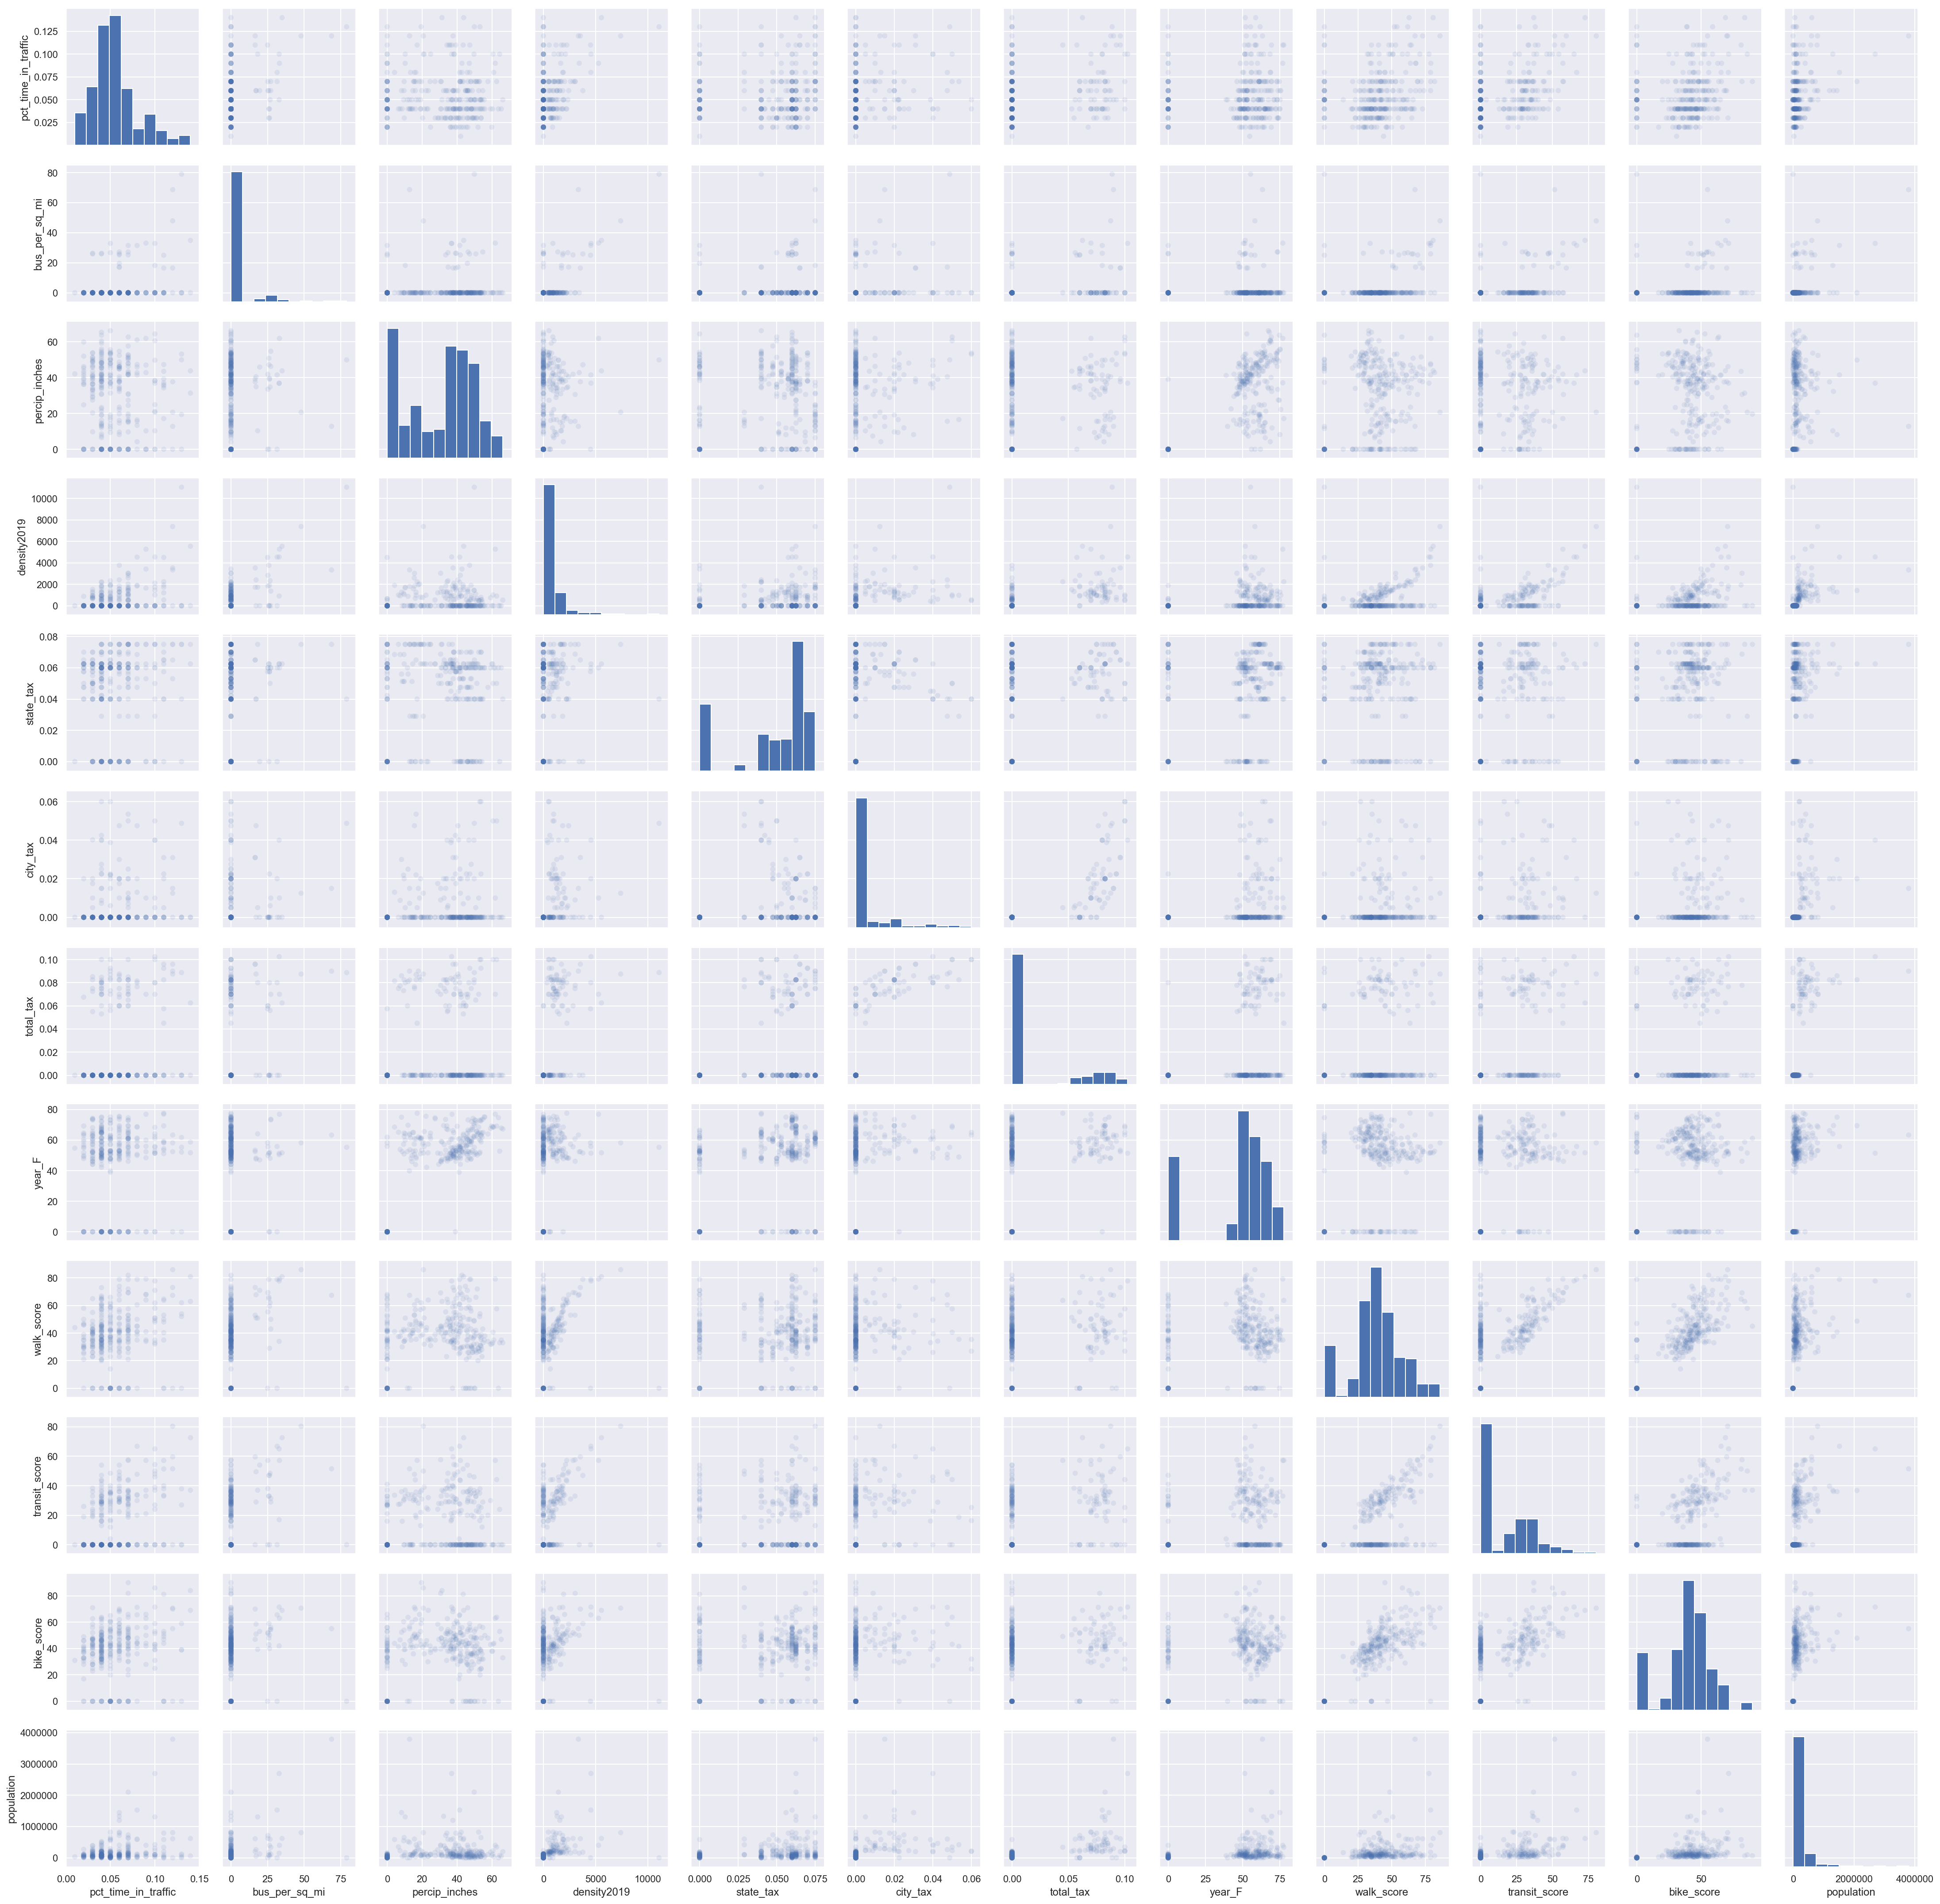

In [31]:
sns.pairplot(df_xy, plot_kws=dict(alpha=.1, edgecolor='none'))

In [32]:
y = df_xy.loc[:,['pct_time_in_traffic']]
X = df_xy.loc[:,['bus_per_sq_mi','percip_inches','density2019',
       'state_tax', 'city_tax', 'total_tax', 
       'year_F', 'walk_score', 'transit_score',
       'bike_score', 'population']]

In [106]:
#df_xy

In [33]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
val_score = lr_model.score(X_val, y_val)

In [37]:
print('\nValidation R^2 score was:', val_score)
print('Feature coefficient results: \n')


Validation R^2 score was: 0.25778566082120247
Feature coefficient results: 



In [38]:
for i, feature in enumerate(X.columns):
    for coef in lr_model.coef_:
        print(feature,':',coef[i]) 

bus_per_sq_mi : 8.922072020284161e-05
percip_inches : -0.00021018054924029086
density2019 : 5.3701467335089055e-06
state_tax : 0.028318654120256217
city_tax : 0.3449000431721799
total_tax : -0.1933507910053497
year_F : 9.164218659084933e-05
walk_score : 5.105256066161925e-05
transit_score : 0.00032564082017887694
bike_score : 2.1770280093380862e-05
population : 7.689540079888656e-09


In [50]:
X.columns

Index(['Intercept', 'bus_per_sq_mi', 'percip_inches', 'density2019',
       'state_tax', 'city_tax', 'year_F', 'walk_score', 'transit_score',
       'bike_score', 'population'],
      dtype='object')

In [40]:
df_xy.corr()

,pct_time_in_traffic,bus_per_sq_mi,percip_inches,density2019,state_tax,city_tax,total_tax,year_F,walk_score,transit_score,bike_score,population
pct_time_in_traffic,1.000000,0.325832,-0.054346,0.409724,0.074026,0.177813,0.244101,0.060739,0.220327,0.400462,0.165511,0.270322
bus_per_sq_mi,0.325832,1.000000,0.056559,0.681742,0.070685,0.205445,0.299340,0.042331,0.211913,0.329344,0.107120,0.440515
percip_inches,-0.054346,0.056559,1.000000,0.098916,0.040734,0.150898,0.107069,0.735508,0.175127,0.071888,0.162918,0.046491
density2019,0.409724,0.681742,0.098916,1.000000,0.130613,0.415065,0.580278,0.200334,0.284466,0.479983,0.220106,0.462248
state_tax,0.074026,0.070685,0.040734,0.130613,1.000000,0.062221,0.226505,0.221388,0.098739,0.092444,0.121818,0.172977
city_tax,0.177813,0.205445,0.150898,0.415065,0.062221,1.000000,0.801718,0.203871,0.098198,0.285923,0.124925,0.414379
total_tax,0.244101,0.299340,0.107069,0.580278,0.226505,0.801718,1.000000,0.276769,0.147236,0.424459,0.180139,0.583973
year_F,0.060739,0.042331,0.735508,0.200334,0.221388,0.203871,0.276769,1.000000,0.206677,0.182425,0.301390,0.220047
walk_score,0.220327,0.211913,0.175127,0.284466,0.098739,0.098198,0.147236,0.206677,1.000000,0.573432,0.768437,0.291840
transit_score,0.400462,0.329344,0.071888,0.479983,0.092444,0.285923,0.424459,0.182425,0.573432,1.000000,0.522753,0.454024


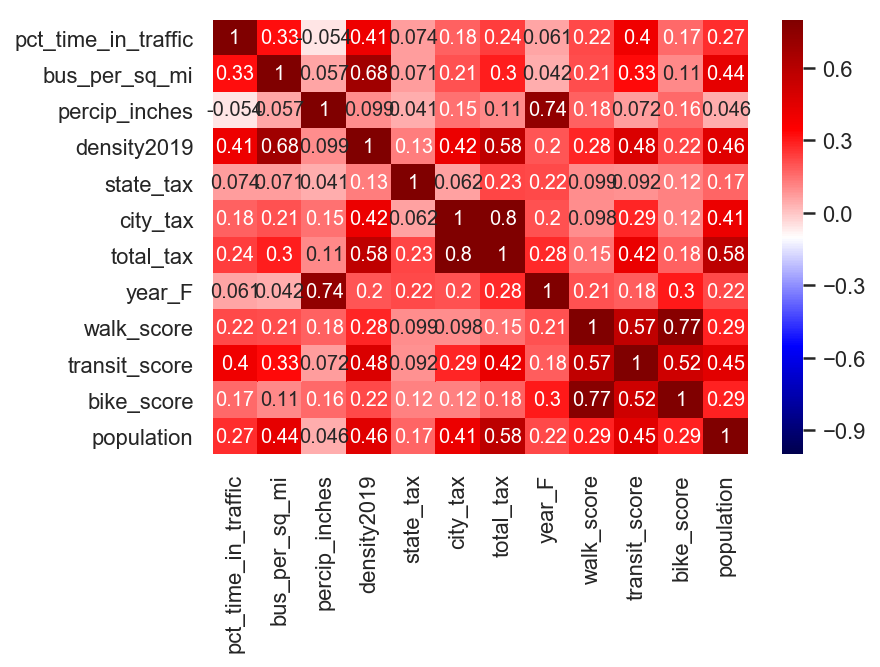

In [41]:
sns.heatmap(df_xy.corr(), cmap="seismic", annot=True, vmin=-1, vmax=.8);

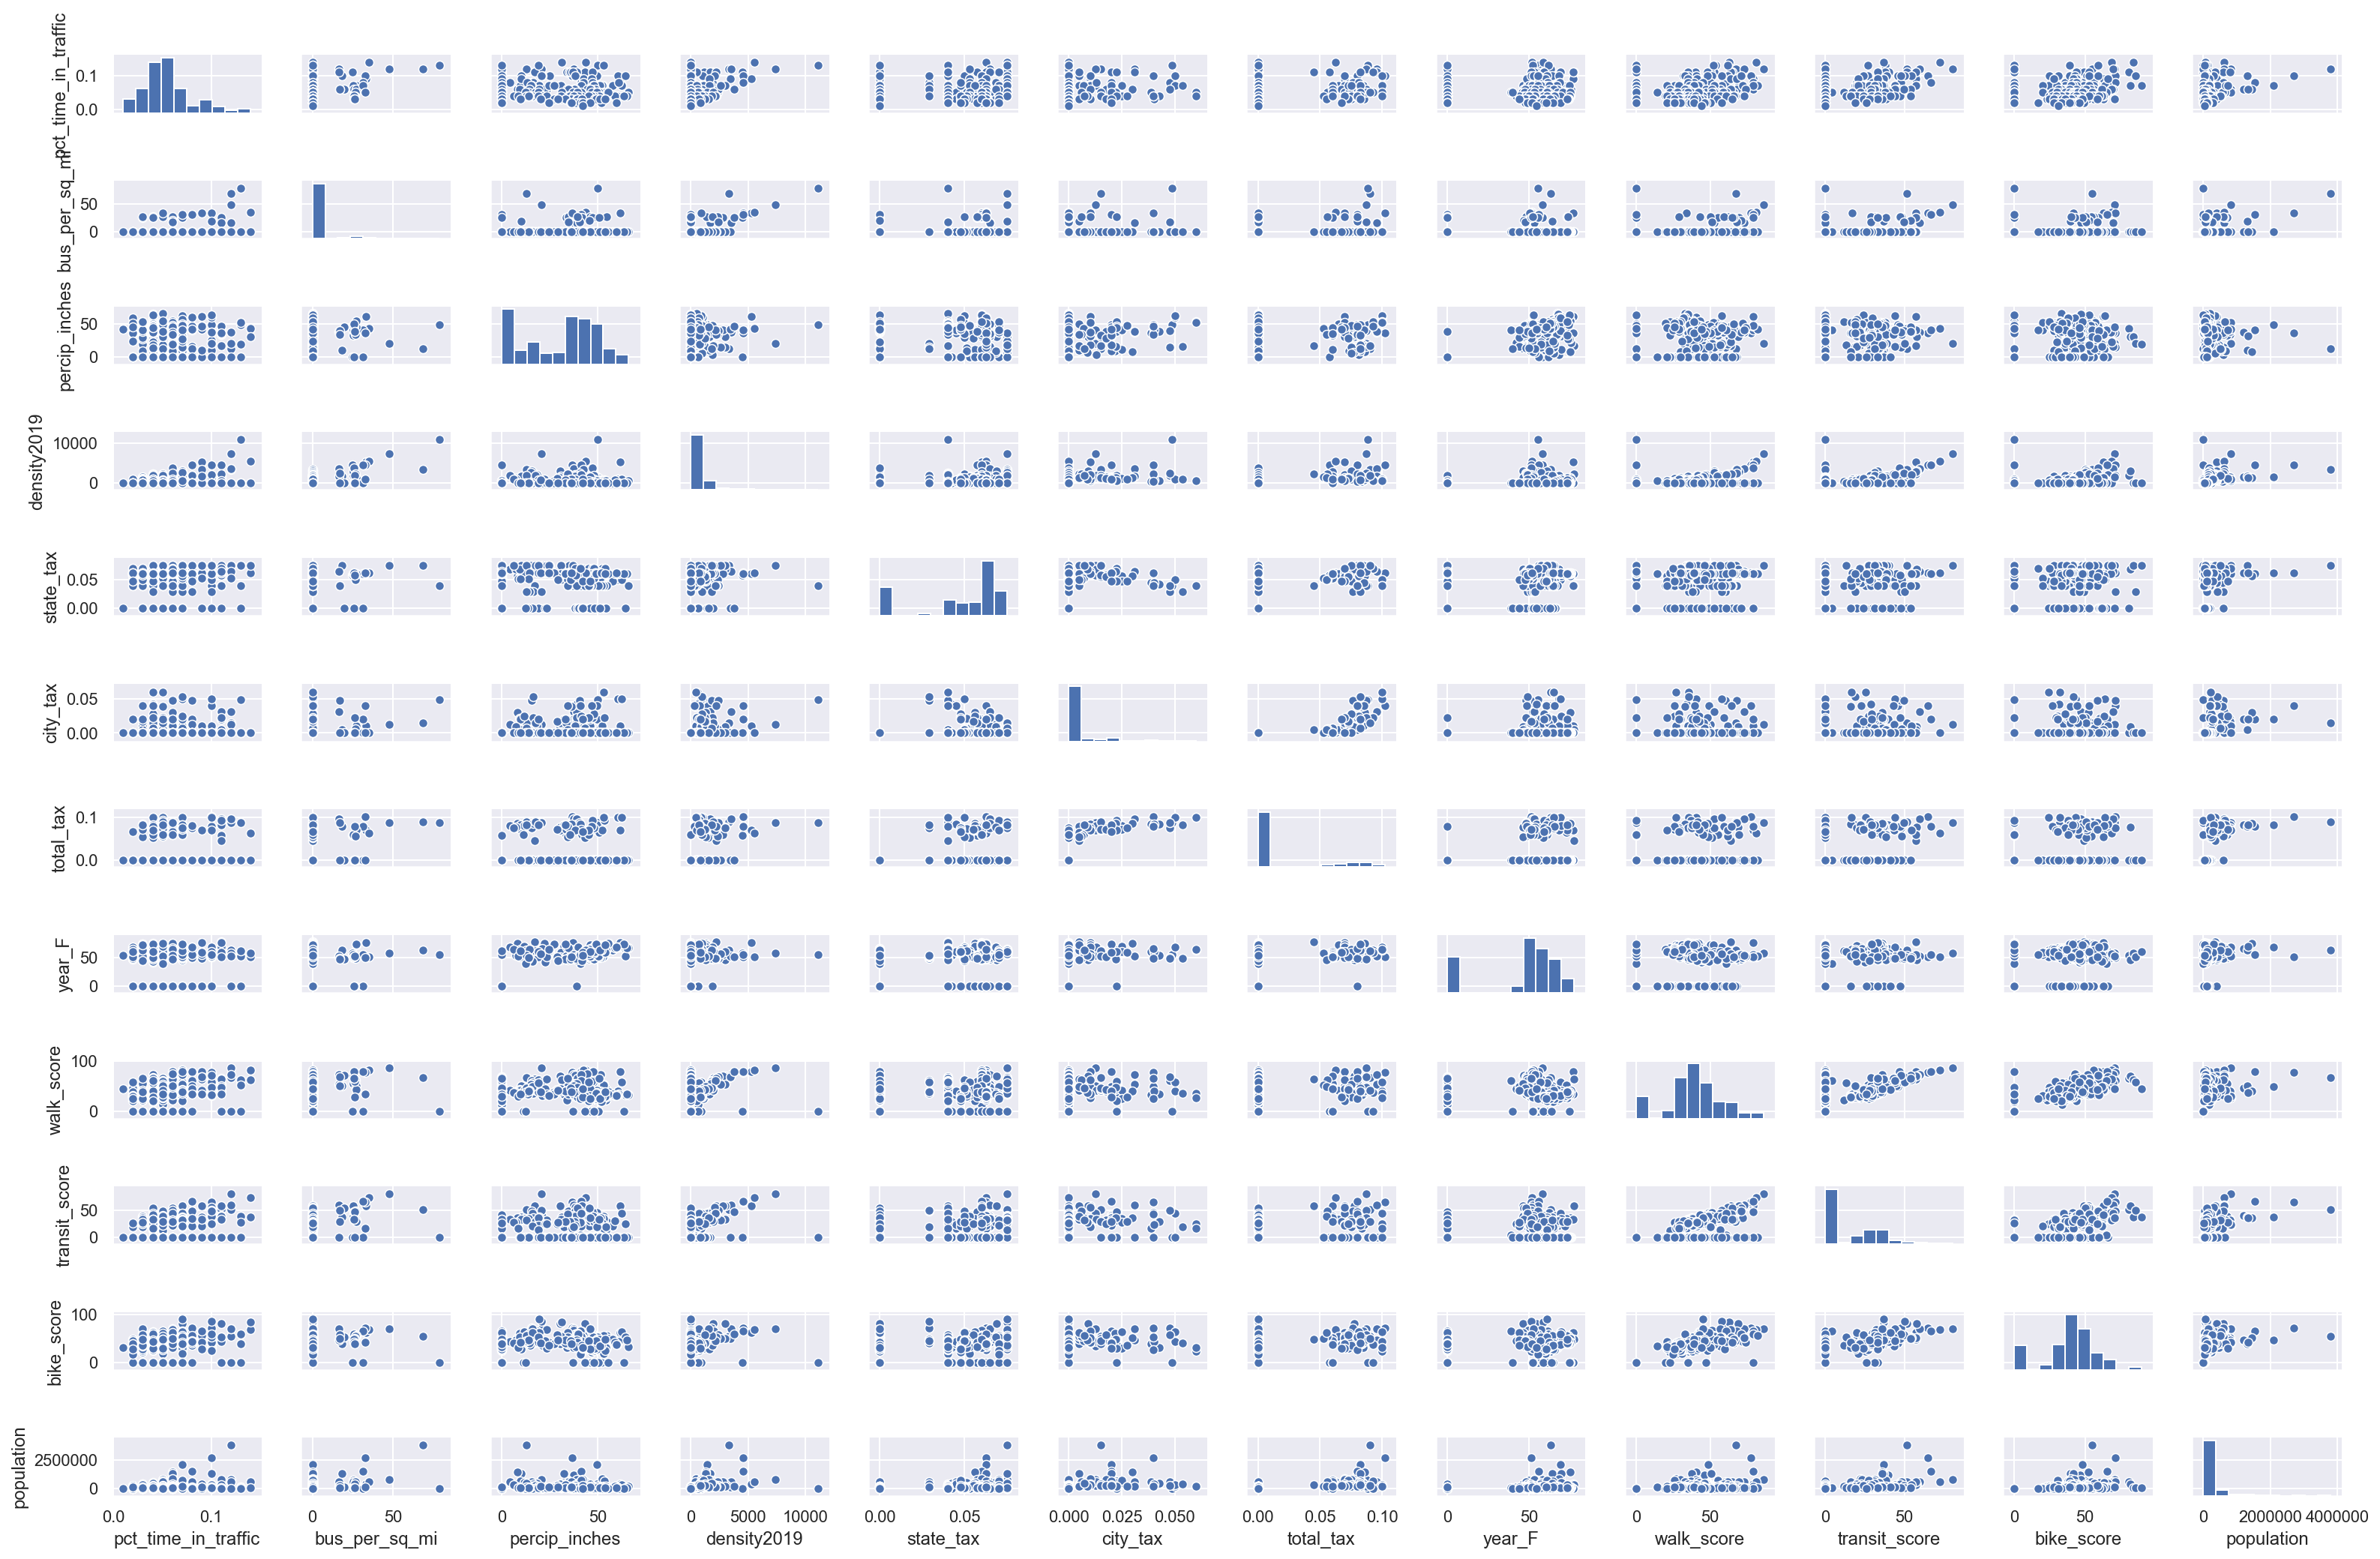

In [42]:
sns.pairplot(df_xy, height=1.2, aspect=1.5);

In [45]:
Xs=patsy.dmatrix('state',data=df,return_type='dataframe')
Xs.columns

Index(['Intercept', 'state[T.AR]', 'state[T.AZ]', 'state[T.CA]', 'state[T.CO]',
       'state[T.CT]', 'state[T.DC]', 'state[T.DE]', 'state[T.FL]',
       'state[T.GA]', 'state[T.HI]', 'state[T.IA]', 'state[T.ID]',
       'state[T.IL]', 'state[T.IN]', 'state[T.KS]', 'state[T.KY]',
       'state[T.LA]', 'state[T.MA]', 'state[T.MD]', 'state[T.ME]',
       'state[T.MI]', 'state[T.MN]', 'state[T.MO]', 'state[T.MS]',
       'state[T.MT]', 'state[T.NC]', 'state[T.ND]', 'state[T.NE]',
       'state[T.NH]', 'state[T.NJ]', 'state[T.NM]', 'state[T.NV]',
       'state[T.NY]', 'state[T.OH]', 'state[T.OK]', 'state[T.OR]',
       'state[T.PA]', 'state[T.RI]', 'state[T.SC]', 'state[T.TN]',
       'state[T.TX]', 'state[T.UT]', 'state[T.VA]', 'state[T.WA]',
       'state[T.WI]', 'state[T.WV]'],
      dtype='object')

In [55]:
df_xy = df_xy[['pct_time_in_traffic', 'bus_per_sq_mi', 'percip_inches', 'density2019','state_tax', 'city_tax', 'total_tax', 'year_F', 'walk_score','transit_score', 'bike_score', 'population']]


In [61]:
df_xy.columns

Index(['pct_time_in_traffic', 'bus_per_sq_mi', 'percip_inches', 'density2019',
       'state_tax', 'city_tax', 'total_tax', 'year_F', 'walk_score',
       'transit_score', 'bike_score', 'population'],
      dtype='object')

# Why does intercept make such a huge difference???

In [66]:
y = df_xy.pct_time_in_traffic
x = df_xy.drop(['pct_time_in_traffic'],1)
#x_w_int = sm.add_constant(x)


lsm = sm.OLS(y,x)

#  Looks like 'make' gives our R-squared a boost


# Fit your model to your training set
fit = lsm.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     pct_time_in_traffic   R-squared:                       0.805
Model:                             OLS   Adj. R-squared:                  0.798
Method:                  Least Squares   F-statistic:                     106.0
Date:                 Tue, 22 Jan 2019   Prob (F-statistic):           2.42e-93
Time:                         22:02:23   Log-Likelihood:                 644.62
No. Observations:                  293   AIC:                            -1267.
Df Residuals:                      282   BIC:                            -1227.
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bus_per_sq_mi     0.0003      0.000      1.290      0.198      -0.000       0.001
percip_inches    -0.0001      0.000     -1.148      0.252      -0.000       0.000
density2019    4.238e-06   2.24e-06      1.891      0.060   -1.74e-07    8.65e-06
state_tax         0.3125      0.062      5.049      0.000       0.191       0.434
city_tax          0.3237      0.237      1.368      0.172      -0.142       0.790
total_tax        -0.1307      0.103     -1.270      0.205      -0.333       0.072
year_F            0.0003      0.000      2.819      0.005    9.46e-05       0.001
walk_score        0.0004      0.000      3.025      0.003       0.000       0.001
transit_score     0.0003      0.000      2.173      0.031    2.43e-05       0.000
bike_score     6.947e-05      0.000      0.504      0.615      -0.000       0.000
population    -2.964e-09   6.07e-09     -0.489      0.626   -1.49e-08    8.98e-09
==============================================================================
Omnibus:                       34.315   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.709
Skew:                           0.902   Prob(JB):                     5.32e-10
Kurtosis:                       3.492   Cond. No.                     6.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
y, X = patsy.dmatrices('pct_time_in_traffic~bus_per_sq_mi+percip_inches+density2019+state_tax+city_tax+year_F+walk_score+transit_score+bike_score+population',data=df_xy, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     pct_time_in_traffic   R-squared:                       0.241
Model:                             OLS   Adj. R-squared:                  0.214
Method:                  Least Squares   F-statistic:                     8.963
Date:                 Tue, 22 Jan 2019   Prob (F-statistic):           8.24e-13
Time:                         21:53:10   Log-Likelihood:                 696.68
No. Observations:                  293   AIC:                            -1371.
Df Residuals:                      282   BIC:                            -1331.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0484      0.004     11.074      0.000       0.040       0.057
bus_per_sq_mi     0.0003      0.000      1.237      0.217      -0.000       0.001
percip_inches    -0.0002      0.000     -2.124      0.035      -0.000   -1.68e-05
density2019    4.571e-06   1.76e-06      2.599      0.010    1.11e-06    8.03e-06
state_tax         0.0030      0.057      0.053      0.958      -0.109       0.115
city_tax          0.0058      0.134      0.043      0.966      -0.258       0.269
year_F            0.0001    9.4e-05      1.192      0.234   -7.29e-05       0.000
walk_score     7.131e-05      0.000      0.591      0.555      -0.000       0.000
transit_score     0.0004   9.88e-05      3.727      0.000       0.000       0.001
bike_score       -0.0001      0.000     -0.882      0.378      -0.000       0.000
population     -1.61e-10    4.8e-09     -0.034      0.973    -9.6e-09    9.28e-09
==============================================================================
Omnibus:                       53.119   Durbin-Watson:                   0.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.353
Skew:                           1.097   Prob(JB):                     3.56e-18
Kurtosis:                       4.329   Cond. No.                     4.13e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""